# 데이콘 Basic Summer

## 쇼핑몰 리뷰 평점 분류 경진대회

### 첫번째 Baseline

[데이콘 Basic Summer
쇼핑몰 리뷰 평점 분류 대회](https://dacon.io/competitions/official/235938/overview/description)

### 1. 데이터 살펴보기

### 1-1. 데이터 준비

먼저 분석하려는 데이터를 가져와서 작업을 진행해보도록 하겠습니다.

In [1]:
pwd

'/workspace/lost+found/Dacon'

In [2]:
ls

 dataset/  'My First Dacon_쇼핑몰 리뷰 평점 분류 경진대회.ipynb'


In [8]:
# 필요한 라이브러리 import
import pandas as pd

# csv 형식의 training 데이터를 로드합니다.
train = pd.read_csv('dataset/train.csv')

### 1-2. 데이터 확인

데이터를 살펴 볼 때에는 pandas의 head(), tail() 그리고 info() 메소드를 활용하여 데이터를 살펴 보는 경우도 많습니다.

In [9]:
# 데이터를 살펴보기 위헤 데이터 최상단의 5줄을 표시합니다.
train.head()

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5


In [10]:
# 데이터를 살펴보기 위해 데이터 최하단의 5줄을 표시합니다.
train.tail()

,id,reviews,target
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2
24999,24999,호호애미 제품은 늘 믿고 써요,5


In [11]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
 2   target   25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB


info() 메소드를 이용해 데이터 결측치 및 변수들의 타입을 확인해본 결과,
타겟 변수를 포함하여 총 3개의 변수와 25000 행으로 이루어져 있습니다.

Non-Null Count 부분을 보니 모든 행에서 결측치(NA)는 발견되지 않았네요!

### 2. 데이터 전처리

### 2-1. Feature Selection

모델링을 하기 앞서, 독립변수 X와 종속변수(타겟변수) y를 설정해야 합니다.

우리의 목적은 주어진 쇼핑몰 리뷰 데이터(독립변수)를 이용하여 평점(target)을 예측하는 것입니다.

그럼 쇼핑몰 리뷰가 X, 평점(target)이 y가 되겠죠?

In [12]:
# training 데이터에서 변수 추출
X = train.reviews

# training 데이터에서 변수 추출 
y = train.target 

### 2-2. 텍스트 전처리

컴퓨터는 일반적으로 문장(텍스트)을 계산할 수 없고 숫자를 입력받아 계산하기 때문에
텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없습니다.

따라서 컴퓨터가 계산을 하기 위해서는 먼저 문장을 숫자 값으로 바꾼 다음 입력해주어야 합니다.
이것을 워드 임베딩(word embedding)이라고 합니다.

이번 베이스라인에서는 그 중에서도 CountVectorizer 이라는 기법을 사용해 문장을 숫자로 표현해보겠습니다.

#### CountVectorizer 의 이해

CountVectorizer 는 입력된 문장을 토큰화(Tokenize)하여 토큰의 등장 빈도 벡터로 바꿔주는 기법입니다.

토큰화란 문장를 의미가 있는 최소의 단위로 쪼개는 것을 의미합니다.

예를 들어 "hello, I am a data scientist!" 라는 문장을 띄어쓰기 기준으로 토큰화 시키면

"hello" "," "I" "am" "a" "data" "scientist" "!" 라는 8개의 토큰으로 토큰화 됩니다.

토큰화를 하는 방식은 여러가지가 있지만 이번 베이스라인에서는 띄어쓰기를 기준으로 토큰화를 진행해보겠습니다.

CountVectorizer 사용을 위해 sklearn 패키지에 있는 CountVectorizer 를 불러옵니다.

In [13]:
# sklearn 패키지의 CountVectorizer를 불러옵니다
from sklearn.feature_extraction.text import CountVectorizer 

sample_vectorizer = CountVectorizer() 

이제 CounterVectorizer 를 학습 시켜주어야 합니다.

어떠한 단어들을 사용할 지, 어떠한 단어가 중요도를 가지는지 학습하는 과정입니다.

CountVectorizer 의 경우 단어의 출현 빈도를 기준으로 문장을 벡터(=숫자의 집합)로 바꿔줍니다.

In [14]:
sample_text1 = ["hello, my name is dacon and I am a data scientist!"]

sample_vectorizer.fit(sample_text1) # CountVectorizer 학습

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

이제 학습이 완료되었습니다.

먼저 sample_vectorizer 가 학습한 단어 목록을 확인해보겠습니다.

이를 Vocabulary라고 하며, 앞으로 sample_vectorizer는 이 Vocab을 기준으로 새로운 문장을 숫자로 바꿔줄 것입니다.

In [15]:
print(sample_vectorizer.vocabulary_) # Vocabulary

{'hello': 4, 'my': 6, 'name': 7, 'is': 5, 'dacon': 2, 'and': 1, 'am': 0, 'data': 3, 'scientist': 8}


"hello, my name is dacon and I am a data scientist" 문장으로 vectorizer 를 학습 시켰는데 I, a, ! 같은 문자들은 어디 간 걸까요?

sklearn의 CountVectorizer는 "I", "a" 와 같이 길이가 2 이하인 단어들과, ",", !" 같은 특수 문자를 의미가 적다고 판단하여 제외시킵니다.

그래서 최종적으로는 9개의 단어들이 Vocab 에 포함되어있습니다.

그럼 이제 학습된 vectorizer를 이용해 다른 문장을 벡터로 transform 해볼까요?

In [16]:
sample_text2 = ["you are learning dacon data science"]

sample_vector = sample_vectorizer.transform(sample_text2)
print(sample_vector.toarray())

[[0 0 1 1 0 0 0 0 0]]


"you are learning dacon data science" 문장을 sample_vectorizer 를 활용해 transform 해보았습니다. 그 결과 Vocabulary에 있는 단어들의 출현 빈도로 이루어진 크기 9의 백터가 출력되었습니다.

이를 BoW (Bag of Words) 라고 합니다.

sample_text2 문장 내에는 "dacon", "data" 단어가 각 1번 씩 출현했습니다.

따라서 Vocabulary에서 "dacon" 과 "data" 에 해당하는 인덱스의 값이 1로 표시되어 있고, 등장하지 않은 단어들은 0으로 표시되어 있습니다.

다른 예시도 살펴보겠습니다.

In [17]:
sample_text3 = ["you are learning dacon data science with news data"]

sample_vector2 = sample_vectorizer.transform(sample_text3)
print(sample_vector2.toarray())

[[0 0 1 2 0 0 0 0 0]]


"you are learning dacon data science with news data" 문장에는 "dacon" 단어가 1번, "data" 단어가 2번 출현했습니다.

따라서 "dacon" 단어에 해당하는 인덱스에는 1의 값이, "data" 에 해당하는 인덱스에는 2의 값이 할당되었습니다.

CountVectorizer 는 위와 같이 작동합니다.

이해를 위해 CountVectorizer 를 하나의 문장을 사용해 학습 시켰기에 생성된 Vocab과 BoW 의 크기는 모두 9 였습니다.

하지만 더 큰 데이터를 사용해 CountVectorizer 를 학습시킨다면 Vocab과 Bow 의 크기는 더욱 증가할 것입니다.

이처럼 BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에,
주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다.

### 2-3. 쇼핑몰 리뷰 데이터 CountVectorizer 적용
먼저 새로운 객체를 생성하여 CountVectorizer 를 할당해 줍니다.

다음 미리 준비해두었던 데이터를 사용해 CountVectorizer 를 학습 시켜줍니다.

In [18]:
train

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5
...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2


In [19]:
# sklearn 패키지의 CountVectorizer import
from sklearn.feature_extraction.text import CountVectorizer 

# countvectorizer 생성
vectorizer = CountVectorizer() 

# countvectorizer 학습
vectorizer.fit(train['reviews']) 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

이제 CountVectorizer 를 학습 시켰습니다.

밑에서 학습한 CountVectorizer를 사용하여 자연어를 숫자형 벡터로 변환하겠습니다.

# 3. 모델링

### 3-1. train/vaildation 정의

이제 우리는 모델을 만들어야 하는데,
모델을 만들기 앞서 내가 만들 모델이 유의미한지 알아야 좋은 결론을 도출 할 수 있겠죠?

하지만 단순히 주어진 데이터로 train셋 데이터를 학습시켜서 목표값인 test 셋에 집어 넣어 예측값을 도출하면,
모델이 적합한지 알 방법이 없습니다.

따라서 train 셋에서 70%를 학습을 시키는데 쓰고, 나머지 25%를 모델이 유의미한지 검증하는데 사용할 것입니다.
이후 유의미하다면, 실제로 제출할 모델을 만들 때, train 셋 100%를 학습을 시키면 되겠죠?

자 그럼 train 셋에서 학습시킬 셋 train_data와 검증할 셋 val_data를 만들어 봅시다!

In [20]:
# sklearn의 train_test_split 함수를 사용합니다.
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train, test_size=0.25, stratify = train.target) # 25프로로 설정

# 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)

In [21]:
# 크기를 확인합니다.
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (18750, 3)
검증할 val 셋 :  (6250, 3)


In [22]:
# training 데이터에서 변수 추출
train_X = train_data.reviews
train_y = train_data.target 

# validation 데이터에서 변수 추출
val_X = val_data.reviews 
val_y = val_data.target 

In [23]:
# CountVectorizer 적용
train_X = vectorizer.transform(train_X)
val_X = vectorizer.transform(val_X)

In [24]:
# 변환이 잘 되었나 확인합니다.
print(train_X[10])

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
vectorizer.inverse_transform(train_X[10])

  (0, 40844)	1
  (0, 60474)	1


[array(['시원한향', '좋습니다앙아엉어아앙아아아어엉여여어엉유유어엉어어유오어어아웅우ㅗ옹오오어우아아어웅어아우웅어어ㅓㅇㄹ'],
       dtype='<U100')]

### 3-2. Logistic Regression
이번 대회에서 예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 1 단위로 끊어지는 분류 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 이용하여 진행하도록 하겠습니다.



In [25]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(train_X, train_y) #모델 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

굉장히 간단하게 학습이 끝났습니다.

이제 이 모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해 봅시다.

### 3-3. 모델 평가

모델이 얼마나 잘 문제를 풀었나 확인해보는 과정이 필요합니다.

먼저 어떤 기준으로 성능을 측정할 것인지 정해야겠죠?

이를 평가 지표 (Metric)라고 합니다.
여기선 이번 대회의 평가 지표인 정확도(ACCURACY)를 사용하겠습니다.

In [26]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

이제 예측값을 생성하여 실제 정답값과 비교해보겠습니다.

위에서 분리해두었던 validation set을 사용합니다.

In [27]:
# val_X를 이용해 예측값을 생성합니다.
y_pred = model.predict(val_X)

In [28]:
# 모델의 예측과 실제 정답값을 비교합니다.
score = ACCURACY(val_y, y_pred)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 60.88% 입니다


모델의 정확도는 60.64% 입니다

### 3-4. train 셋 + val 셋 100% 활용하는 모델 만들기
이제 검증 셋으로 성능이 유의미한지 확인을 하였다면 데이터를 100% 활용하기 위하여
검증 셋을 포함한 train 셋을 만들어보겠습니다.

In [29]:
# 최종적으로 학습에 사용할 모든 리뷰를 설정해줍니다.
X = train_data.reviews
y = train_data.target

vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X) #countvectorizer 학습
X = vectorizer.transform(X) #transform

이제 위에서 한 것과 같은 학습 과정을 거칩니다.

In [30]:
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(X, y) #모델 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

이제 모델 학습이 완료되었습니다!

모델이 잘 학습되었는지 확인하기 위해 X의 첫번째 문장을 모델에 넣어보도록 하겠습니다.

In [31]:
from sklearn.metrics import accuracy_score

#run model
y_pred = model.predict(X[0])
print('예측 라벨 : ', y_pred)
print('실제 라벨 : ', train.target[0])

예측 라벨 :  [2]
실제 라벨 :  2


In [32]:
vectorizer.inverse_transform(X[0]) #역변환하여 첫번째 문장의 단어들 확인

[array(['2주', '넘게', '말씀드렸더니', '보내준다해놓고', '소식이', '쓰고', '없네요', '있습니다', '제품은',
        '충전기', '하나빠져서'], dtype='<U100')]

보시다시피 X의 첫번째 문장은 2의 평점으로 잘 분류된 것을 확인해 볼 수 있습니다.

### 3-5. 예측하기
이제 학습된 모델을 이용하여 주어진 test데이터로 예측을 진행해 보겠습니다.

앞서 train 셋에서 했던 동일한 전처리 과정을 거치되, data leakage가 발생하지 않도록 주의합니다.

In [33]:
# 예측에 사용할 파일 읽기
test = pd.read_csv("dataset/test.csv") 

# 파일 확인
test.head() 

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요


이제 test 데이터를 transform 합니다. 그 후 test 데이터의 label 을 예측합니다.



In [34]:
# 문서 데이터 생성
test_X = test.reviews 

# 문서 데이터 transform 
test_X_vect = vectorizer.transform(test_X) 

test 데이터를 대상으로 fit 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으로, 데이콘의 규정 상 data leakage 에 해당합니다.

따리서 test에 fit을 처리하지 않도록 주의합시다.



In [35]:
# test 데이터 예측
pred = model.predict(test_X_vect) 
print(pred)

[5 5 5 ... 2 5 1]


예측값을 성공적으로 생성했습니다.

# 4. 데이콘 제출하기

### 4-1. submission 파일 생성

이제 예측한 값을 sample_submission.csv에 넣어 제출용 파일을 생성해봅시다.

In [36]:
# 제출용 파일 불러오기
submission = pd.read_csv("dataset/sample_submission.csv") 

submission.head() 

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [37]:
# 예측 값 넣어주기
submission["target"] = pred 

# 데이터가 잘 들어갔는지 확인합니다.
submission.head() 

,id,target
0,0,5
1,1,5
2,2,5
3,3,2
4,4,1


In [38]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv",index=False)

### 4-2. 데이콘 페이지 제출

다음으로, 실제 데이콘 홈페이지에서 제출해보도록 하겠습니다.

이 과정을 통해 우리의 모델이 목표로 하는 데이터에 대해 어느 정도의 성능을 가지는지, 다른 사람들은 어느 정도의 성능을 얻었는지 확인할 수 있습니다.

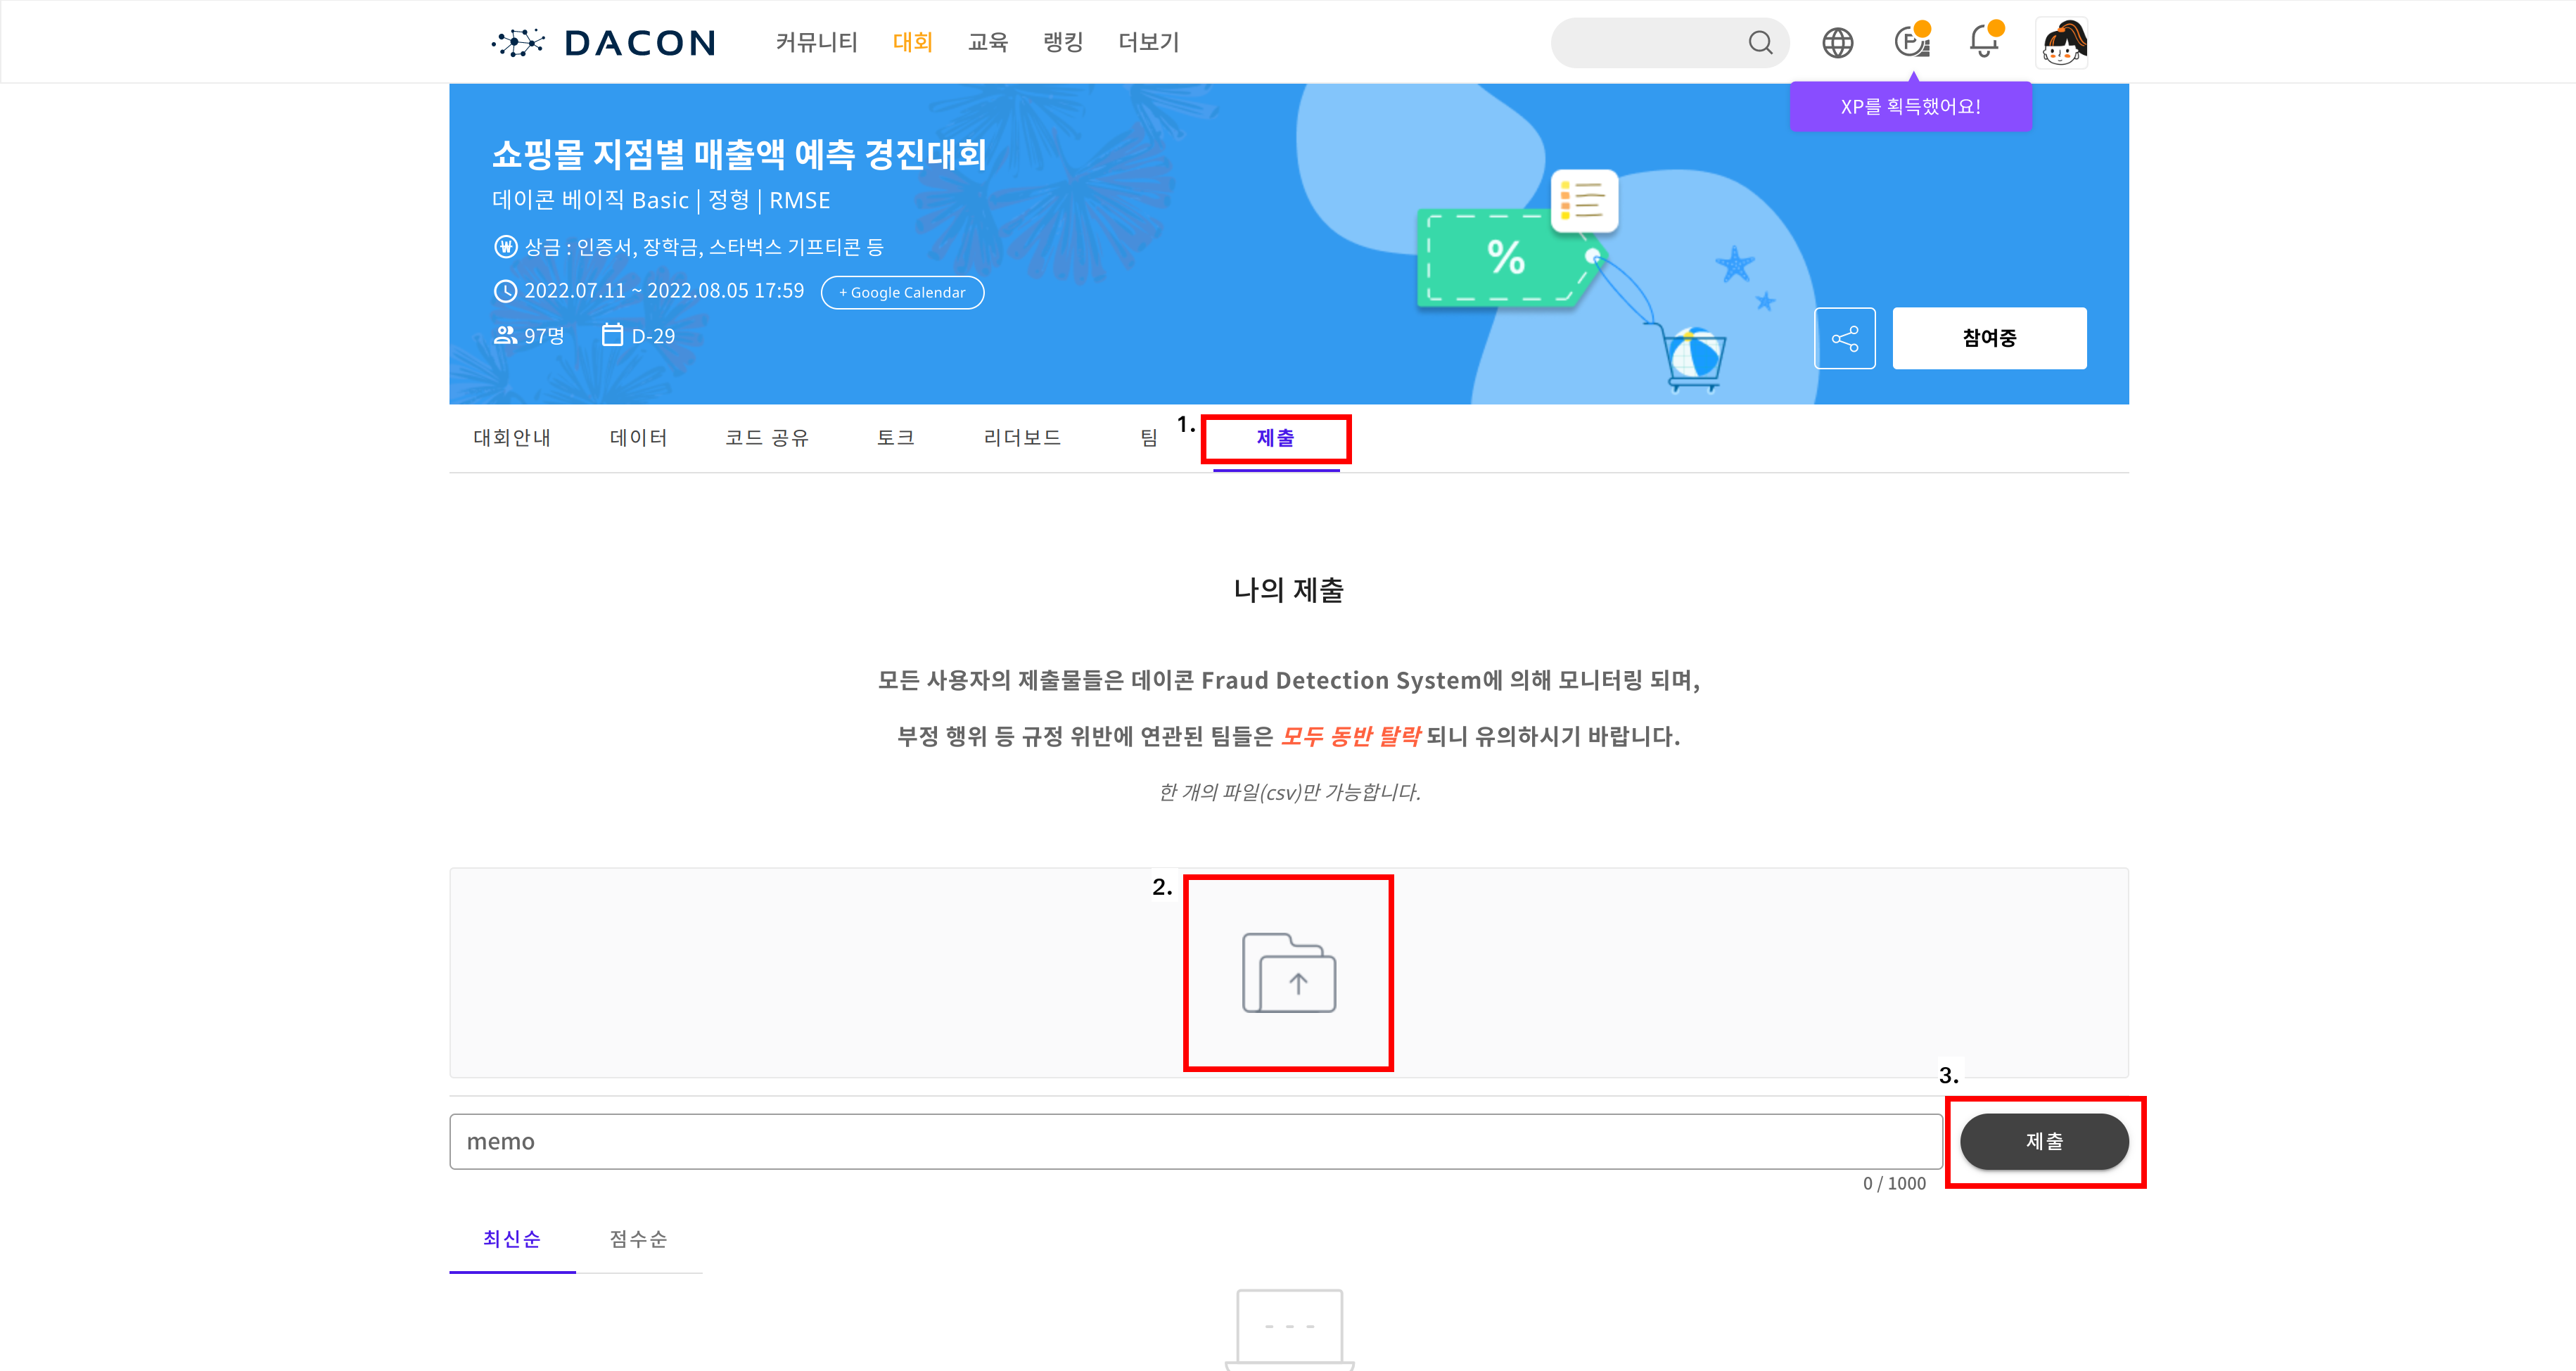

1. 먼저 대회 페이지에서 제출 탭의 버튼을 누르면 파일 업로드 화면으로 전환됩니다.

2. 전환된 화면에서 서류모양 아이콘을 클릭하여 제출할 파일을 선택하거나 파일을 마우스로 끌어와 서류모양 아이콘 위에 던져두면 파일을 업로드 할 수 있습니다.

3. 업로드가 완료되었다면 까만색 제출 버튼을 클릭합니다.

제출이 완료되었다면 [리더보드] 탭으로 이동하여 자신의 순위가 어디인지 확인해보세요!

그리고 자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함께 해봐요! :]